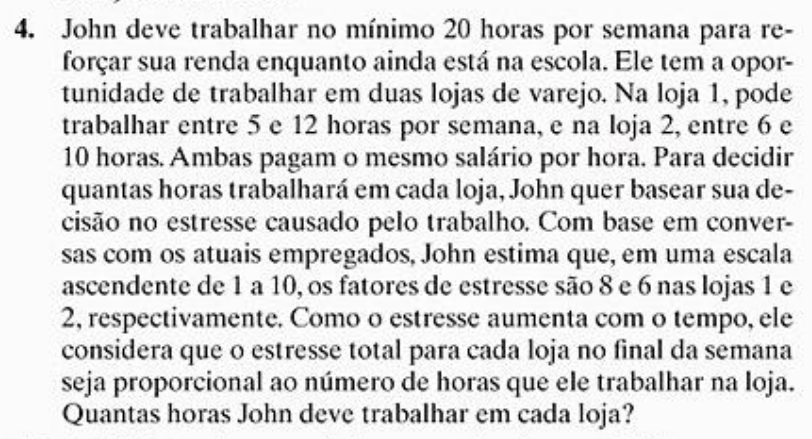

In [1]:
%pip install cplex
%pip install docplex

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from docplex.mp.model import Model

# Criação do modelo com um nome descritivo
model = Model('Alocacao_Minima_Estresse_John')

In [3]:
# --- Parâmetros extraídos do enunciado ---

# Nomes das lojas para referência
lojas = ['loja1', 'loja2']

# Fator de estresse por hora em cada loja
fator_estresse = {'loja1': 8, 'loja2': 6}

# Limites de horas de trabalho
horas_minimas_totais = 20
horas_minimas_por_loja = {'loja1': 5, 'loja2': 6}
horas_maximas_por_loja = {'loja1': 12, 'loja2': 10}

In [4]:
# 1. Variáveis de Decisão
# Horas a serem trabalhadas em cada loja
horas_trabalhadas = model.continuous_var_dict(lojas, name='Horas')


# 2. Função Objetivo
# Minimizar o estresse total
expressao_estresse = (fator_estresse[lj] * horas_trabalhadas[lj] for lj in lojas)
soma_estresse_total = model.sum(expressao_estresse)
model.minimize(soma_estresse_total)


# 3. Restrições

# Restrição 1: Total Mínimo de Horas de Trabalho
# A soma das horas nas duas lojas deve ser no mínimo 20.
expressao_horas_totais = (horas_trabalhadas[lj] for lj in lojas)
soma_horas_totais = model.sum(expressao_horas_totais)
restr_min_horas_logica = soma_horas_totais >= horas_minimas_totais
model.add_constraint(restr_min_horas_logica, ctname='limite_min_horas_totais')

# Restrições 2 e 3: Limites de Horas por Loja
for lj in lojas:
    # Restrição de horas mínimas por loja
    restr_min_loja_logica = horas_trabalhadas[lj] >= horas_minimas_por_loja[lj]
    model.add_constraint(restr_min_loja_logica, ctname=f'min_horas_{lj}')

    # Restrição de horas máximas por loja
    restr_max_loja_logica = horas_trabalhadas[lj] <= horas_maximas_por_loja[lj]
    model.add_constraint(restr_max_loja_logica, ctname=f'max_horas_{lj}')

In [5]:
# Define um tempo limite para o solver (opcional)
model.parameters.timelimit = 120

# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA ------\n')
print(solucao)

--- Resolvendo o modelo ---
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               120
Tried aggregator 1 time.
LP Presolve eliminated 5 rows and 2 columns.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.00 ticks)

------ SOLUÇÃO ÓTIMA ------

solution for: Alocacao_Minima_Estresse_John
objective: 140
status: OPTIMAL_SOLUTION(2)
Horas_loja1=10.000
Horas_loja2=10.000

